In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
user = "postgres"
password = "bholebaba12"
host = "localhost"
port = "5433"
dbname = "banking_dbs"

In [3]:
conn_str = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}"

In [4]:
engine = create_engine(conn_str)

In [5]:
query = "select * from banking_data"

In [6]:
df = pd.read_sql_query(query, engine)

In [7]:
print(df.head(5))

  client_id             name  age  location_id joined_bank   banking_contact  \
0  IND81288    Raymond Mills   24        34324  2019-05-06    Anthony Torres   
1  IND65833    Julia Spencer   23        42205  2001-12-10  Jonathan Hawkins   
2  IND47499   Stephen Murray   27         7314  2010-01-25     Anthony Berry   
3  IND72498   Virginia Garza   40        34594  2019-03-28        Steve Diaz   
4  IND60181  Melissa Sanders   46        41269  2012-07-20        Shawn Long   

  nationality            occupation fee_structure loyalty_classification  ...  \
0    American  Safety Technician IV          High                   Jade  ...   
1     African   Software Consultant          High                   Jade  ...   
2    European    Help Desk Operator          High                   Gold  ...   
3    American          Geologist II           Mid                 Silver  ...   
4    American   Assistant Professor           Mid               Platinum  ...   

   bank_deposits  checking_accou

In [8]:
# generate descriptive statistics for  the dataframe 
df.describe()

,age,location_id,estimated_income,superannuation_savings,amount_of_credit_cards,credit_card_balance,bank_loans,bank_deposits,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,br_id,gender_id,ia_id
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   client_id                 3000 non-null   object 
 1   name                      3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   location_id               3000 non-null   int64  
 4   joined_bank               3000 non-null   object 
 5   banking_contact           3000 non-null   object 
 6   nationality               3000 non-null   object 
 7   occupation                3000 non-null   object 
 8   fee_structure             3000 non-null   object 
 9   loyalty_classification    3000 non-null   object 
 10  estimated_income          3000 non-null   float64
 11  superannuation_savings    3000 non-null   float64
 12  amount_of_credit_cards    3000 non-null   int64  
 13  credit_card_balance       3000 non-null   float64
 14  bank_loa

In [10]:
df.shape

(3000, 25)

In [11]:
bins =[0,10000,30000,float("inf")]
labels = ['low','medium','high']
df['Income Band']= pd.cut(df["estimated_income"], bins = bins , labels= labels , right = False)


<Axes: xlabel='Income Band'>

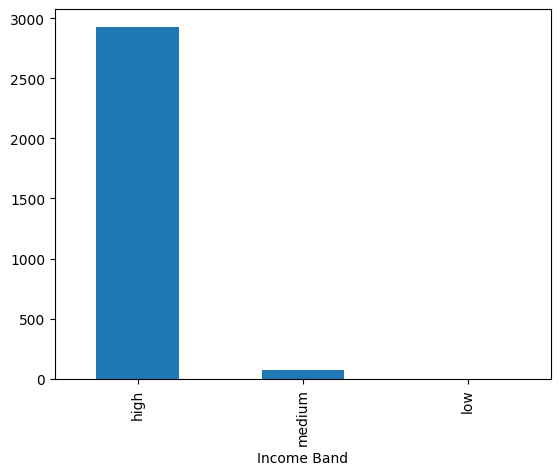

In [12]:
df['Income Band'].value_counts().plot(kind = 'bar')

In [13]:
# examine the distribution of  unique categories into categorical columns 
categorical_cols =df[ [
    'br_id', 'gender_id', 'ia_id',
    'amount_of_credit_cards', 'properties_owned', 'risk_weighting','nationality','occupation','fee_structure',
    'loyalty_classification','properties_owned','risk_weighting','Income Band'
]].columns

for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    display(df[col].value_counts())



Value counts for 'br_id':


br_id
3    1352
1     660
2     495
4     493
Name: count, dtype: int64


Value counts for 'gender_id':


gender_id
2    1512
1    1488
Name: count, dtype: int64


Value counts for 'ia_id':


ia_id
1     177
2     177
3     177
4     177
8     177
9     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64


Value counts for 'amount_of_credit_cards':


amount_of_credit_cards
1    1922
2     765
3     313
Name: count, dtype: int64


Value counts for 'properties_owned':


properties_owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64


Value counts for 'risk_weighting':


risk_weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64


Value counts for 'nationality':


nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64


Value counts for 'occupation':


occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64


Value counts for 'fee_structure':


fee_structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64


Value counts for 'loyalty_classification':


loyalty_classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64


Value counts for 'properties_owned':


properties_owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64


Value counts for 'risk_weighting':


risk_weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64


Value counts for 'Income Band':


Income Band
high      2929
medium      71
low          0
Name: count, dtype: int64

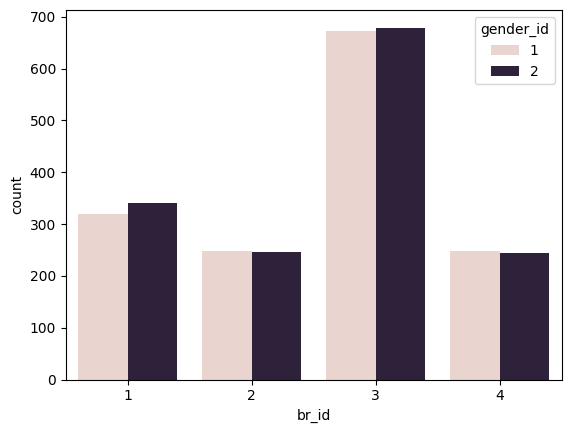

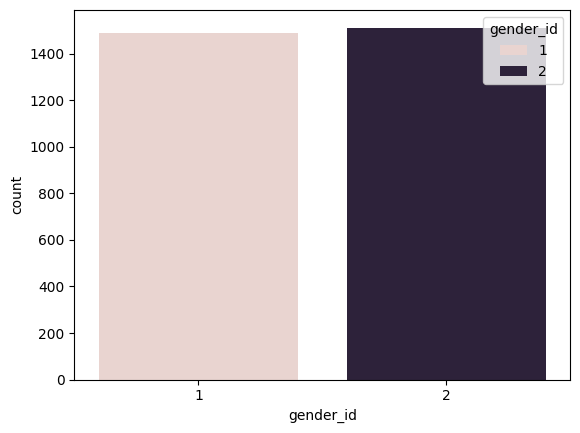

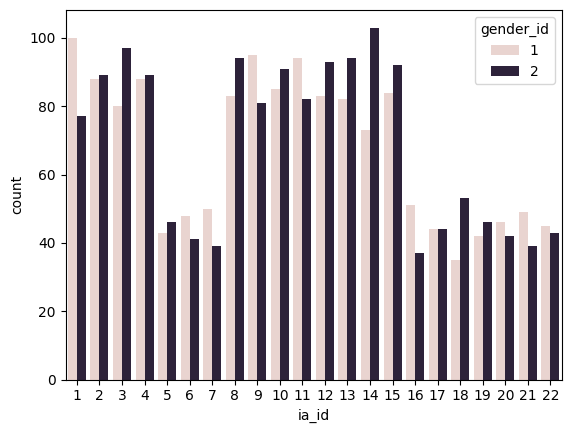

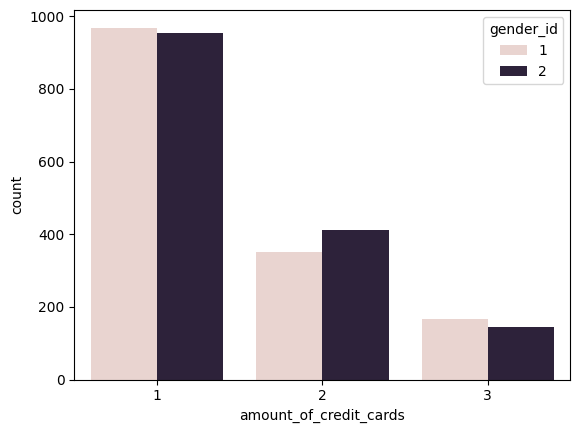

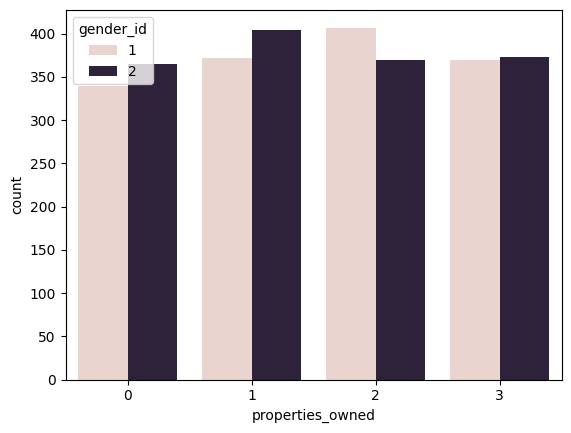

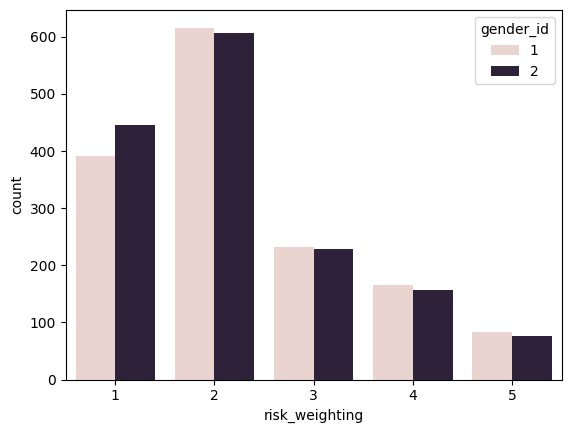

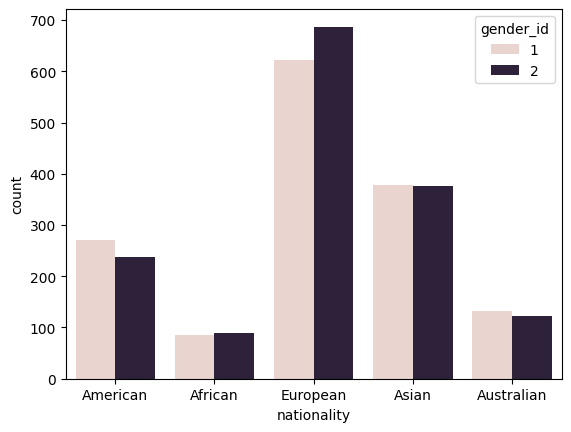

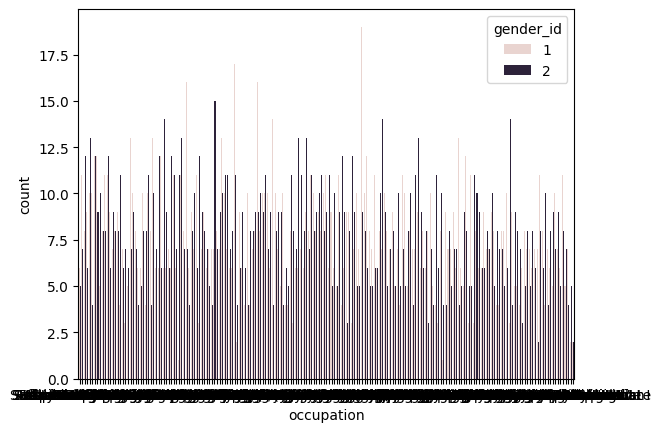

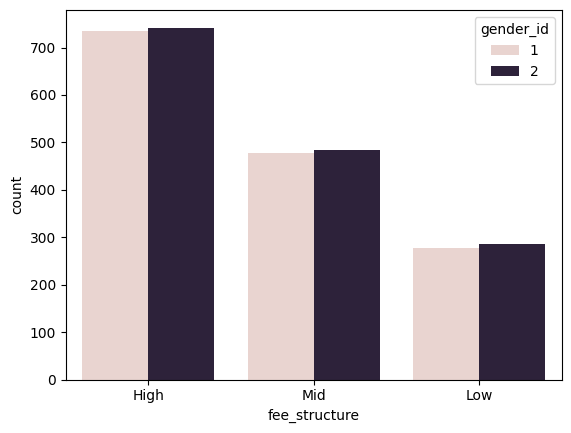

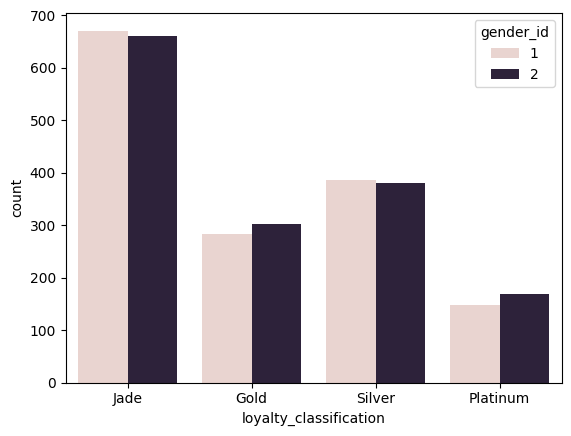

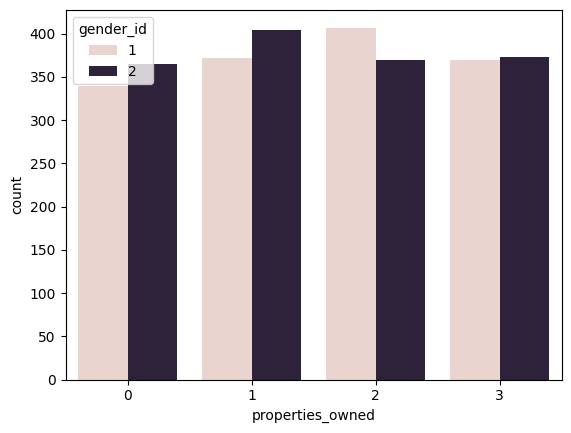

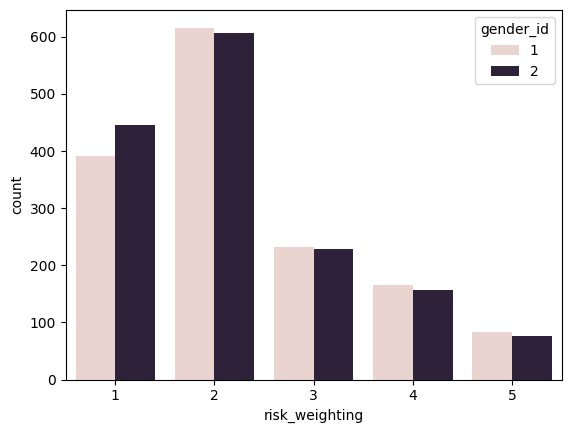

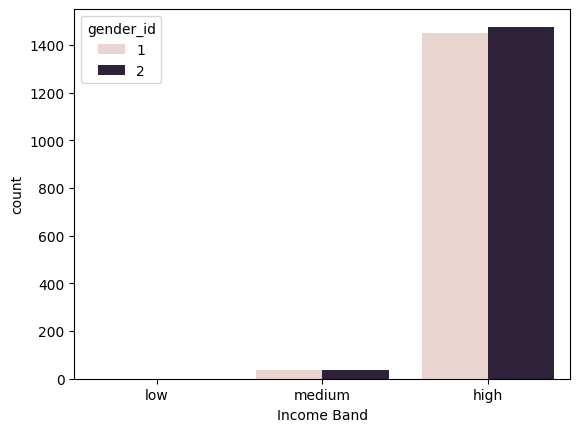

In [14]:
for i,predictor in enumerate(df[ [
    'br_id', 'gender_id', 'ia_id',
    'amount_of_credit_cards', 'properties_owned', 'risk_weighting','nationality','occupation','fee_structure',
    'loyalty_classification','properties_owned','risk_weighting','Income Band'
]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor,hue='gender_id')
            

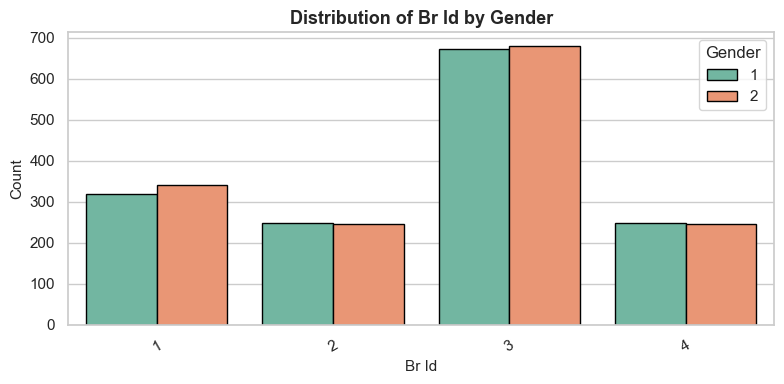

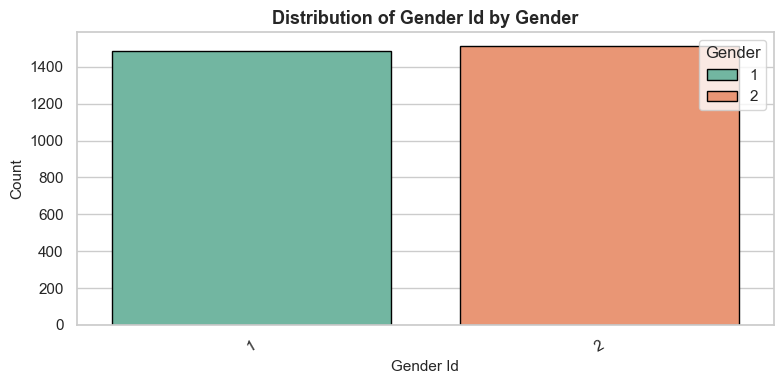

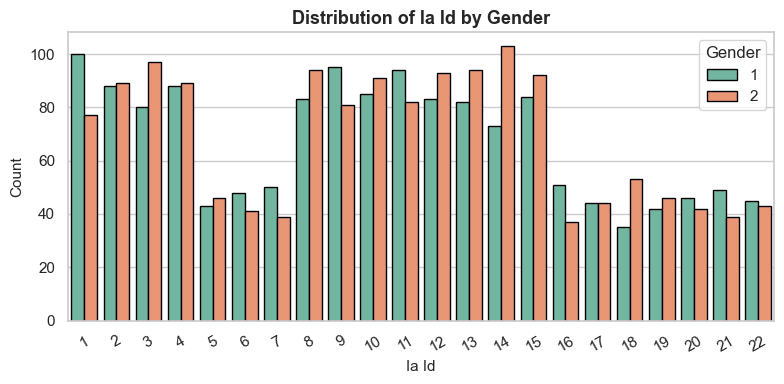

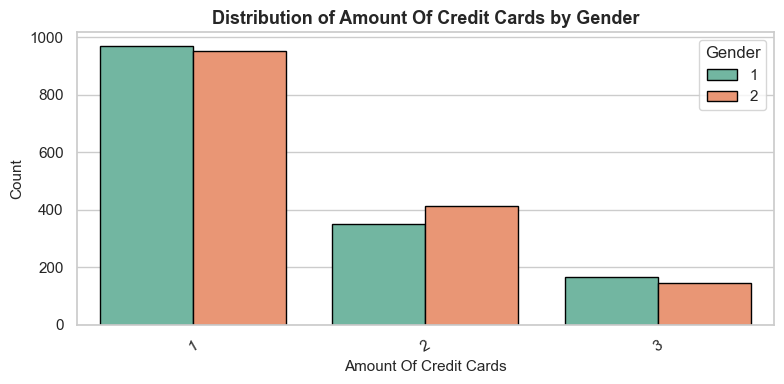

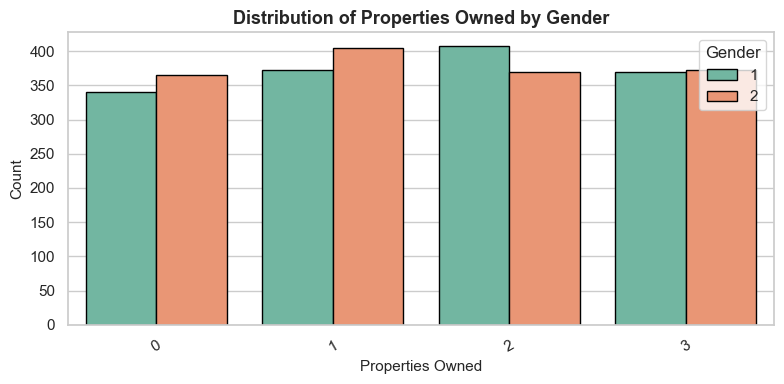

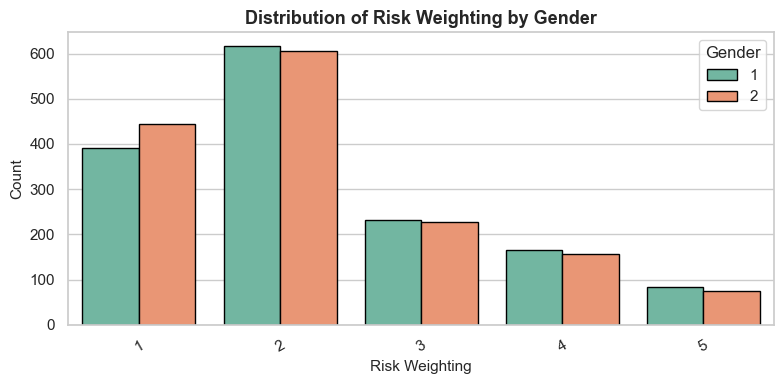

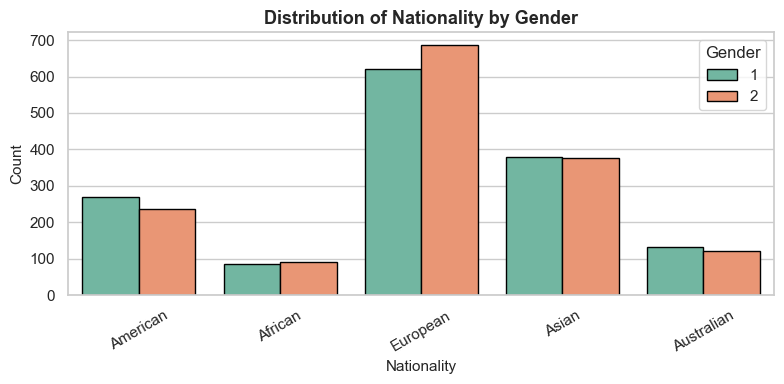

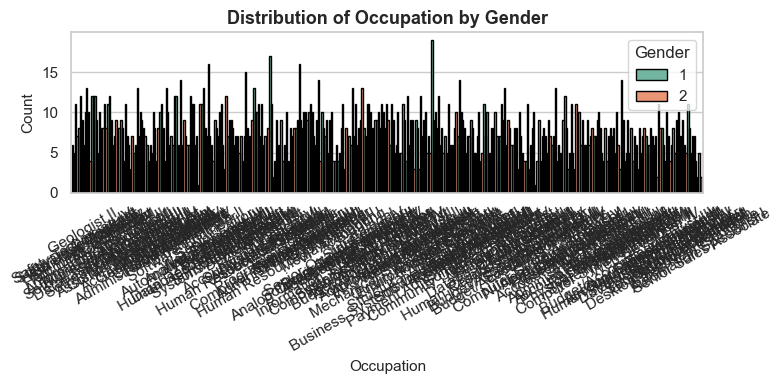

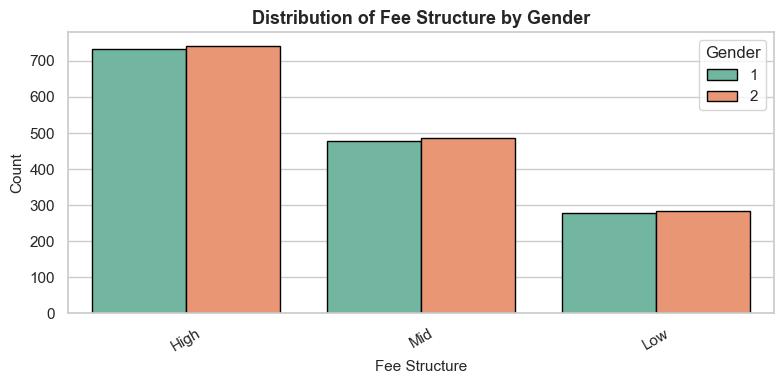

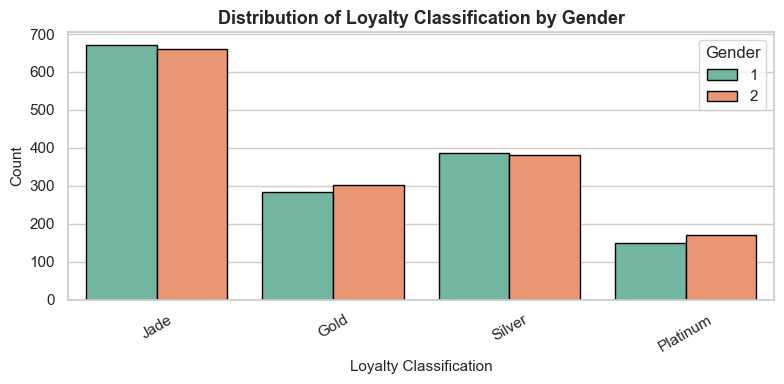

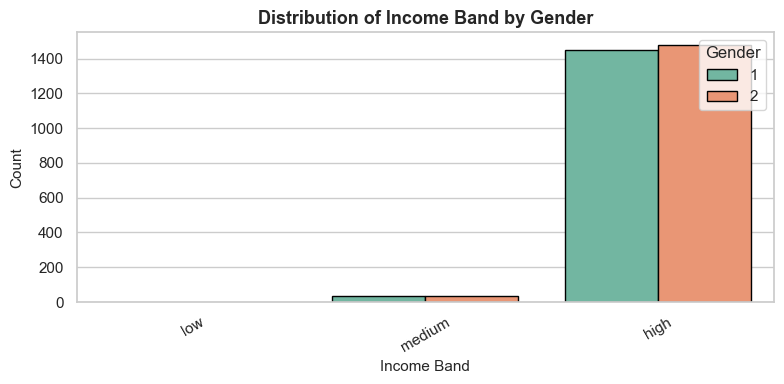

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

categorical_cols = [
    'br_id', 'gender_id', 'ia_id', 'amount_of_credit_cards',
    'properties_owned', 'risk_weighting', 'nationality',
    'occupation', 'fee_structure', 'loyalty_classification', 'Income Band'
]

for i, predictor in enumerate(categorical_cols):
    plt.figure(i, figsize=(8, 4))
    sns.countplot(
        data=df,
        x=predictor,
        hue='gender_id',
        palette='Set2',  # 🔹 automatic soft pastel palette
        edgecolor='black'
    )
    plt.title(f"Distribution of {predictor.replace('_', ' ').title()} by Gender", fontsize=13, weight='bold')
    plt.xlabel(predictor.replace('_', ' ').title(), fontsize=11)
    plt.ylabel("Count", fontsize=11)
    plt.legend(title='Gender', loc='upper right')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


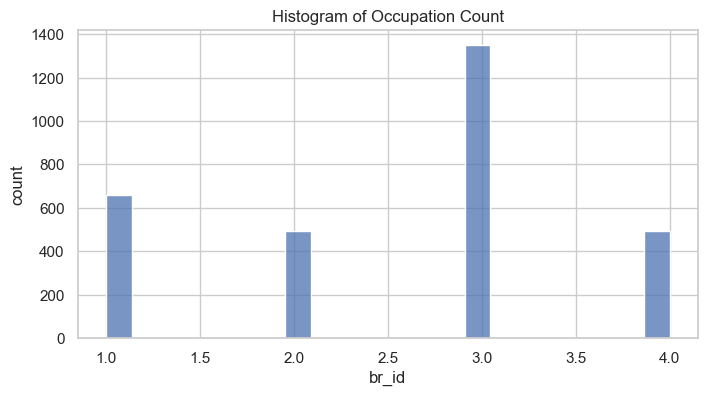

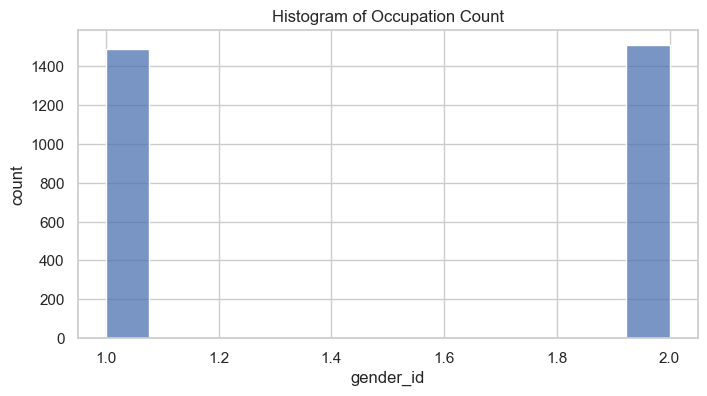

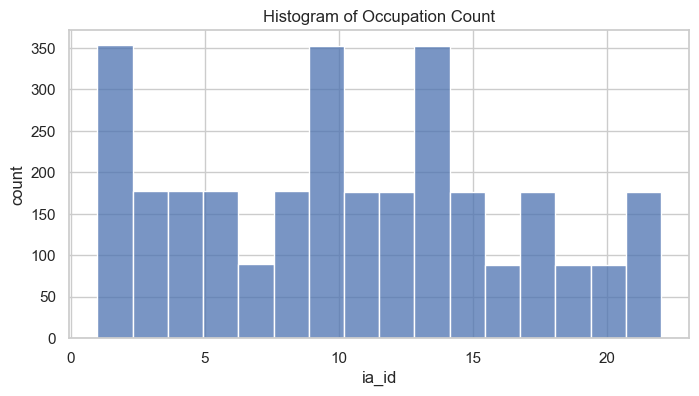

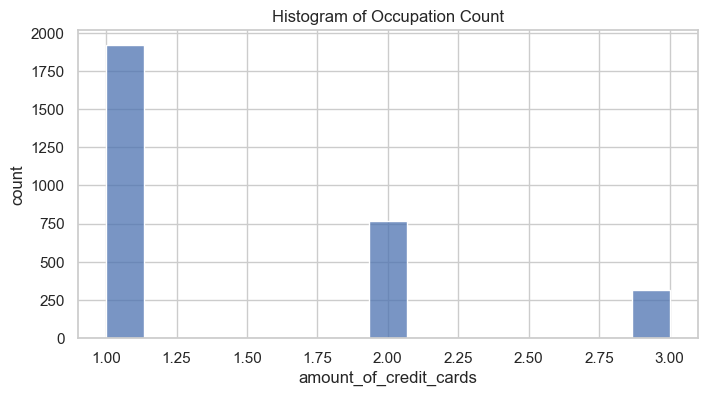

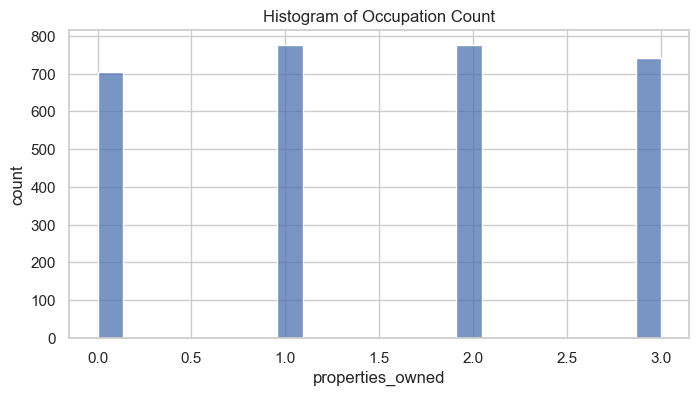

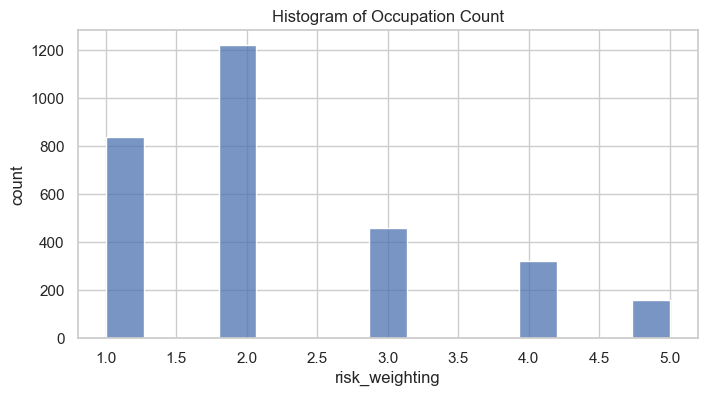

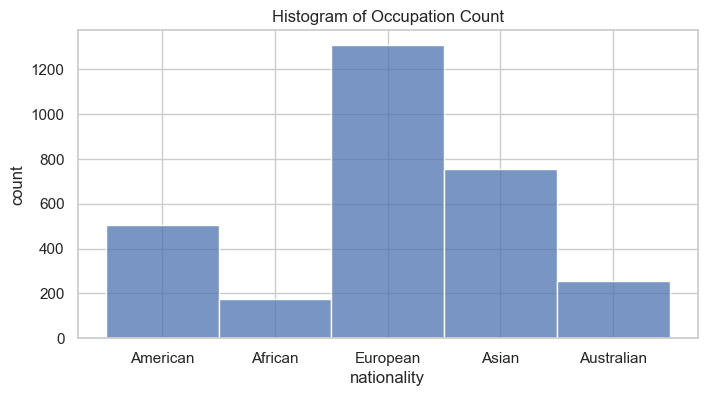

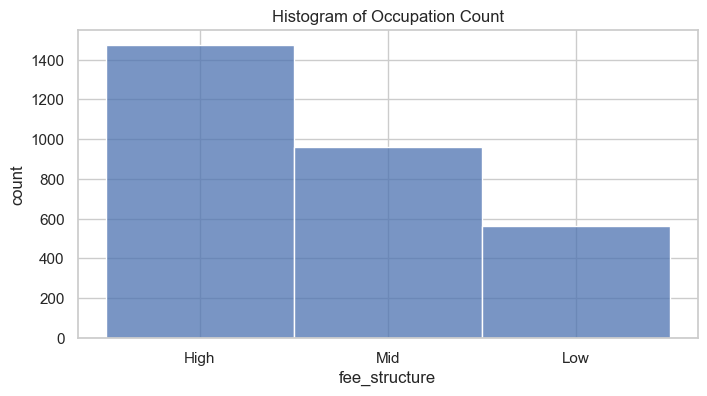

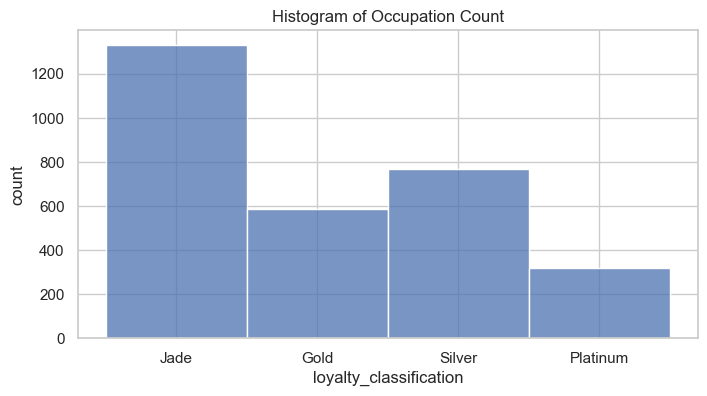

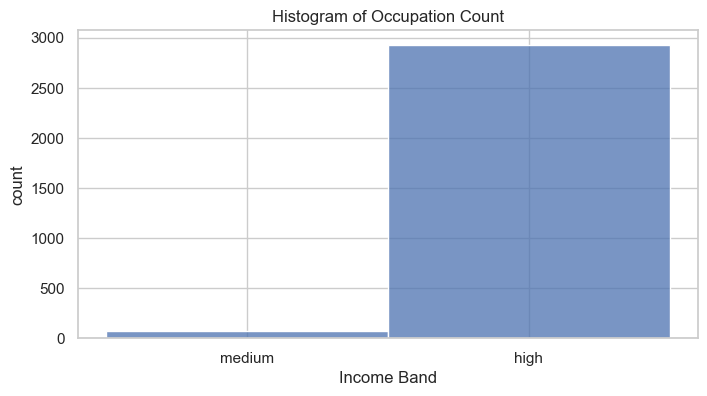

In [21]:
# histplot of value counts for different occupation
for col in categorical_cols:
    if col == "occupation":
        continue  # <--- This 'continue' is still here
    
    plt.figure(figsize=(8,4)) # <--- **THIS IS THE CODE THAT IS RUNNING**
    sns.histplot(df[col])
    plt.title("Histogram of Occupation Count")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

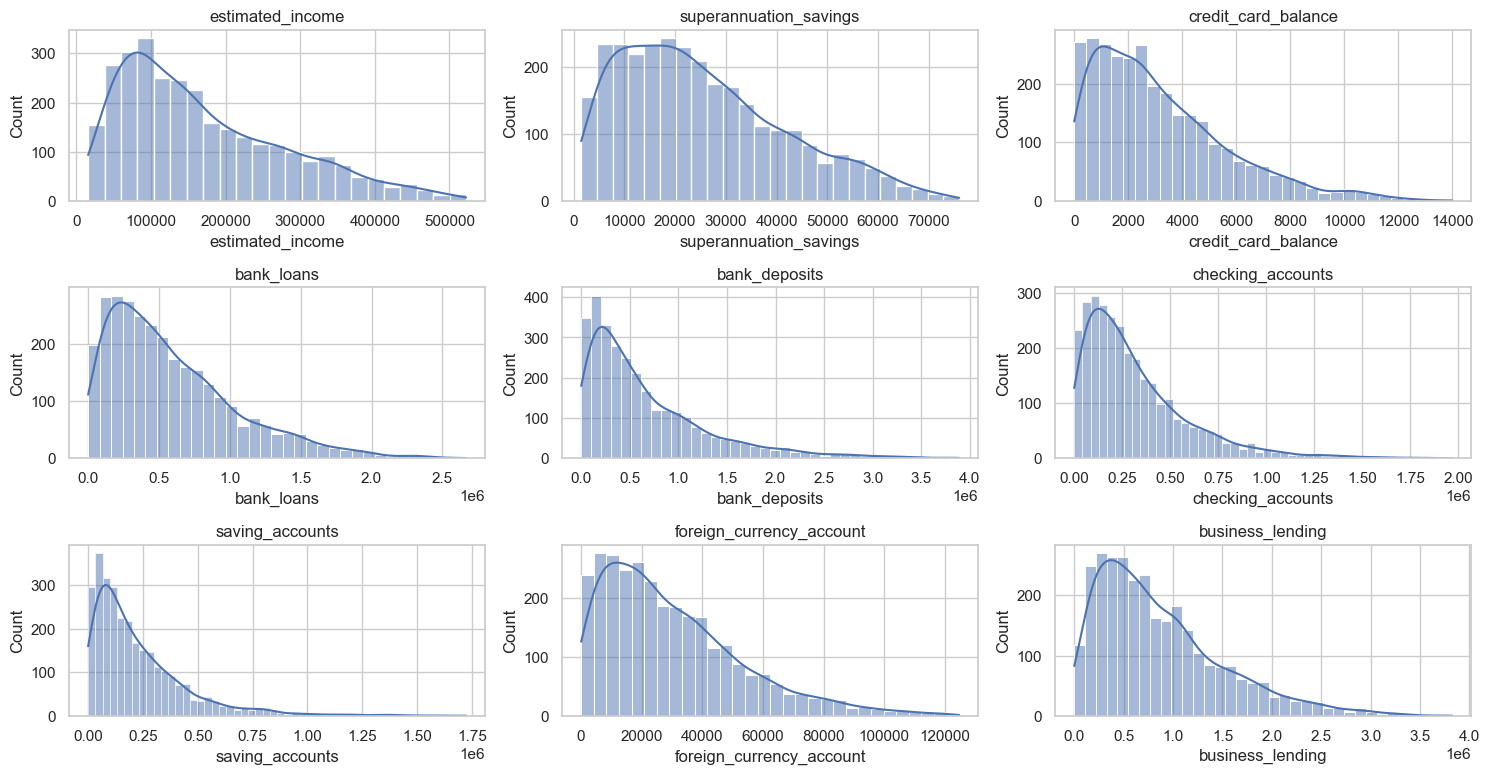

In [30]:
# numerical analysis
numerical_cols = ['estimated_income','superannuation_savings','credit_card_balance','bank_loans','bank_deposits','checking_accounts','saving_accounts'
                  ,'foreign_currency_account','business_lending']
# univariate analysis and visualization
plt.figure(figsize=(15,10))
for i,col in enumerate (numerical_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col],kde = True)
    plt.title(col)
plt.tight_layout()
plt.show()

## heatmaps

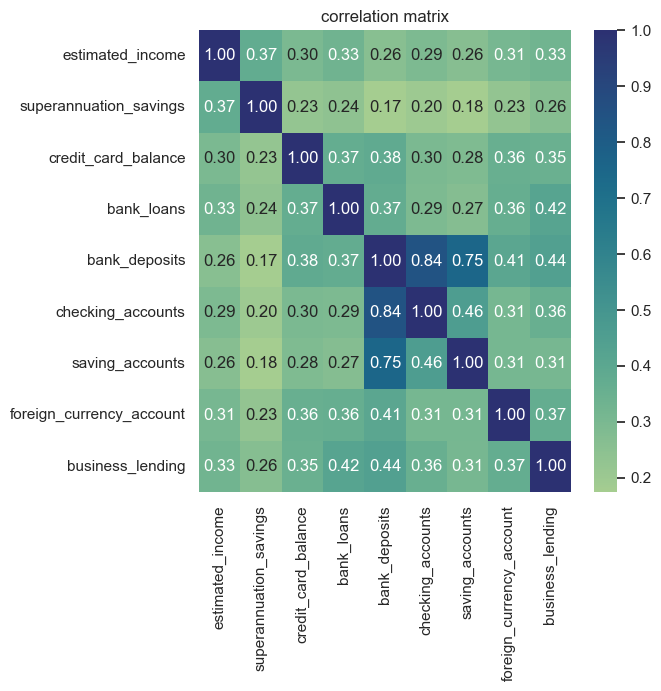

In [33]:
numerical_cols = ['estimated_income','superannuation_savings','credit_card_balance','bank_loans','bank_deposits','checking_accounts','saving_accounts'
                  ,'foreign_currency_account','business_lending']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot =True ,cmap = 'crest',fmt='.2f')
plt.title('correlation matrix')
plt.show()